In [114]:
#some data cleaning
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from statistics import mean
#from scipy import stats
#from scipy.stats import chi2_contingency 
#import time

#df = pd.read_csv('spotify_cleaned.csv')
##draw scatterplot and use corrlation (no need for association as its for categorical data
#l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness"]
#for i in range(len(l)):
#        df.plot.scatter(x=l[i], y='popularity')
#        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
#        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))



#df1 = df.groupby('popularity')
#df1 = df1.mean()
#df1 = df1.reset_index()



##draw scatterplot and use corrlation (no need for association as its for categorical data
#l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness"]
#for i in range(len(l)):
#        df1.plot.scatter(x=l[i], y='popularity')
#        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
#        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
#        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))




energy (-0.052816160986637335, 1.4465615512823966e-41)
energy SpearmanrResult(correlation=-0.0548598973179084, pvalue=1.0342639695620801e-44)
liveness (-0.12366393954424162, 7.694790797035543e-221)
liveness SpearmanrResult(correlation=-0.06976587217212596, pvalue=2.927574355456814e-71)
tempo (-0.038502827094044005, 7.391022519789213e-23)
tempo SpearmanrResult(correlation=-0.05098315599930578, pvalue=7.5964734095764e-39)
speechiness (0.0026670287793428005, 0.49554435610853614)
speechiness SpearmanrResult(correlation=-0.012357217205168379, pvalue=0.0015896094051852628)
loudness (0.12776549620530558, 1.0345940690575466e-235)
loudness SpearmanrResult(correlation=0.20644959518002037, pvalue=0.0)
key (-0.016498754210884575, 2.4837023041510526e-05)
key SpearmanrResult(correlation=-0.01591916536475294, pvalue=4.738952861862048e-05)
mode (0.026402516449864404, 1.4998952441819094e-11)
mode SpearmanrResult(correlation=0.01646837343433714, pvalue=2.5705939059280635e-05)
year (-0.1451300248990818, 

/Users/caxi.w/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


speechiness (0.49767323440540173, 1.8515044851206897e-07)
speechiness SpearmanrResult(correlation=0.4809657696255634, pvalue=5.363655816076445e-07)
loudness (0.7097163075808939, 2.81945907219825e-16)
loudness SpearmanrResult(correlation=0.7279166586972182, pvalue=2.0442351310180274e-17)
key (0.03404431046781409, 0.7392899463804475)
key SpearmanrResult(correlation=-0.06658017131214554, pvalue=0.5148033855718794)
mode (-0.3029906711674513, 0.00242462107312389)
mode SpearmanrResult(correlation=-0.39857059064362027, pvalue=4.807532749777778e-05)
year (0.38732886558656215, 8.144161093204613e-05)
year SpearmanrResult(correlation=0.42574150132571426, pvalue=1.2402137177725726e-05)
valence (0.001558652010591327, 0.9878471718109004)
valence SpearmanrResult(correlation=0.07712513308978698, pvalue=0.450351580985499)
instrumentalness (-0.9261164206289101, 1.9830686697220885e-42)
instrumentalness SpearmanrResult(correlation=-0.976907726539538, pvalue=3.7441786493238983e-66)
duration_ms (-0.48255802

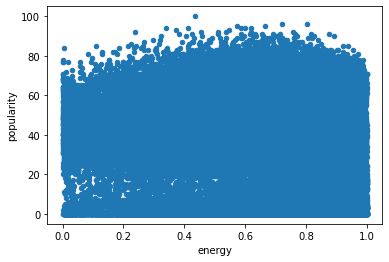

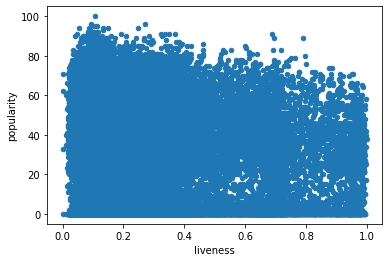

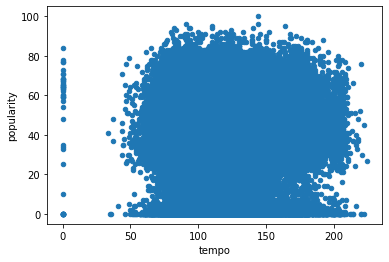

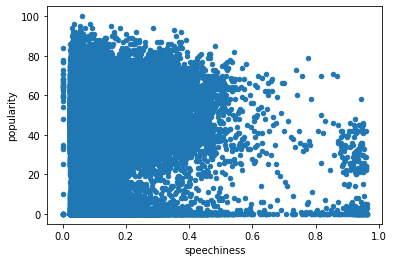

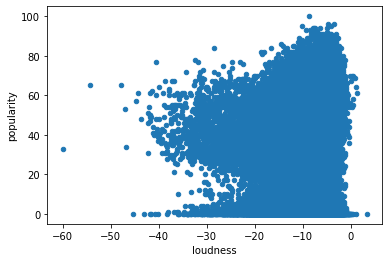

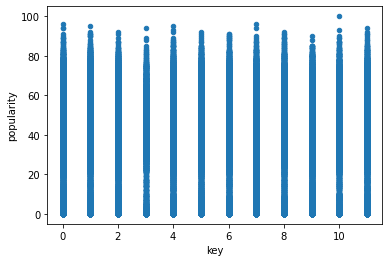

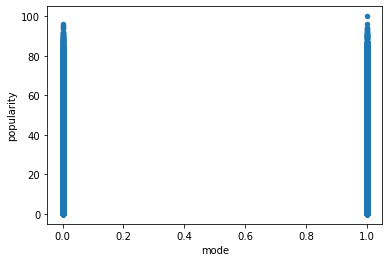

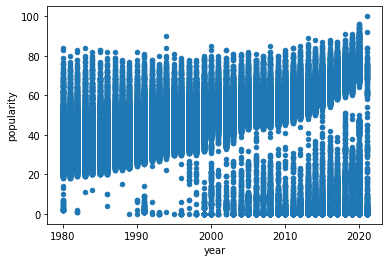

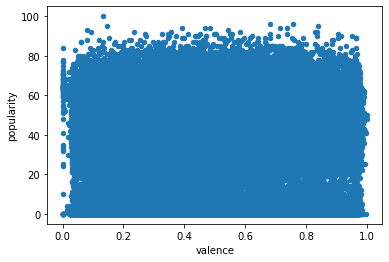

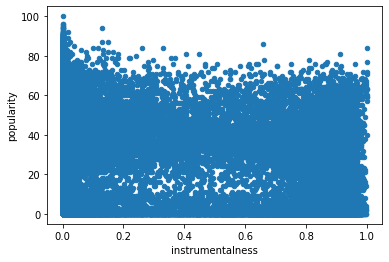

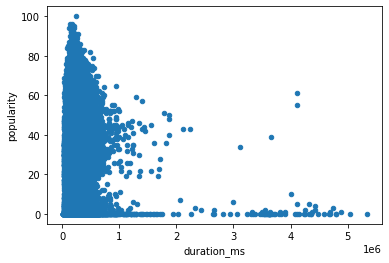

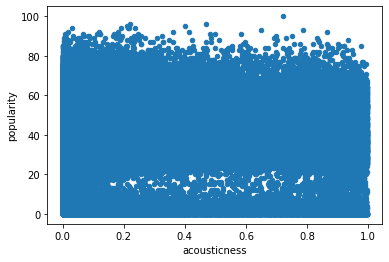

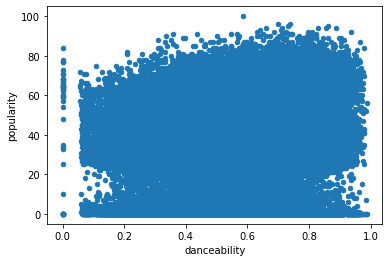

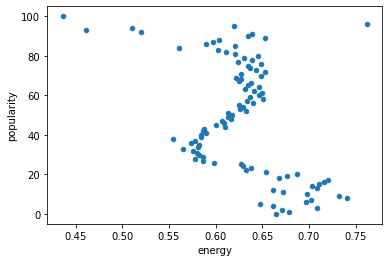

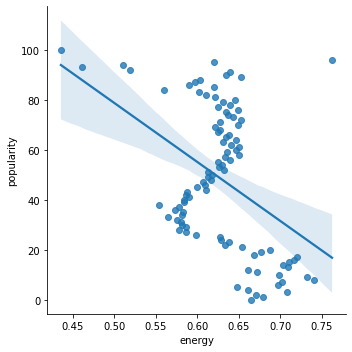

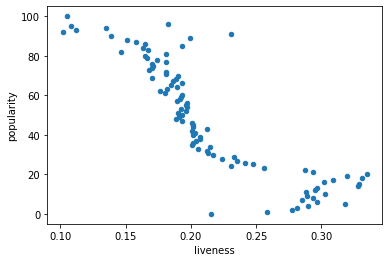

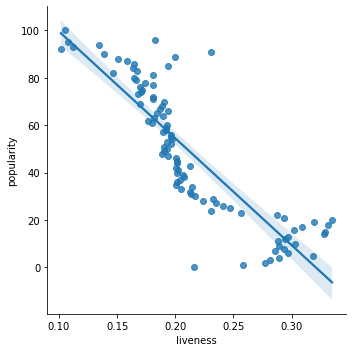

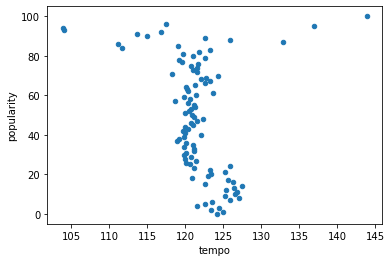

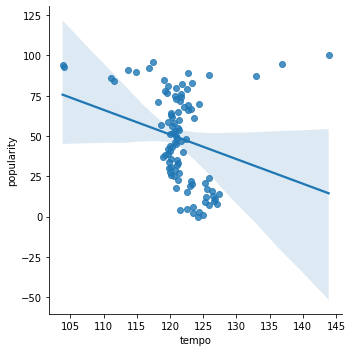

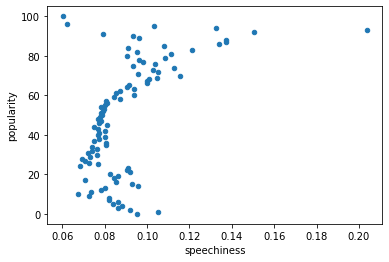

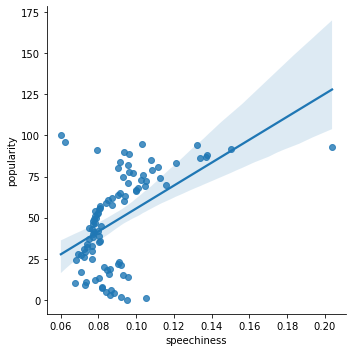

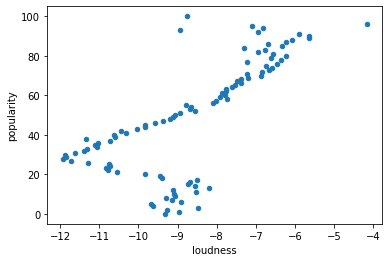

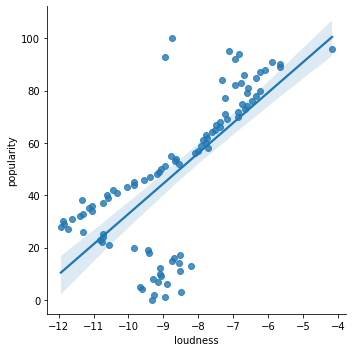

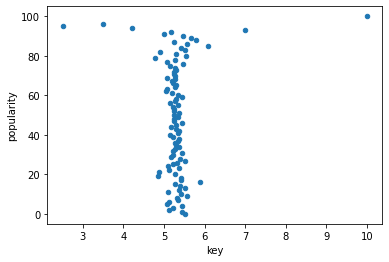

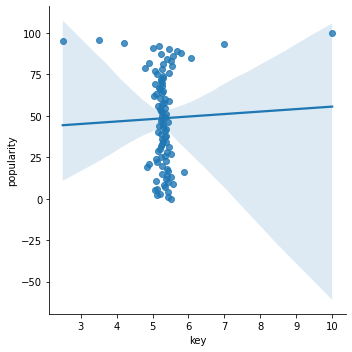

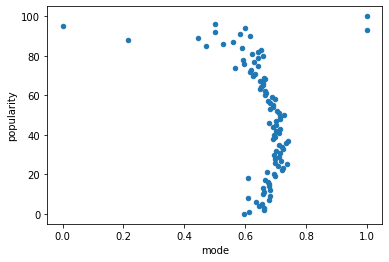

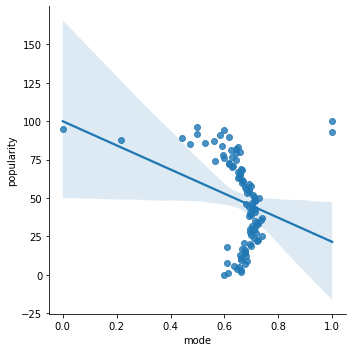

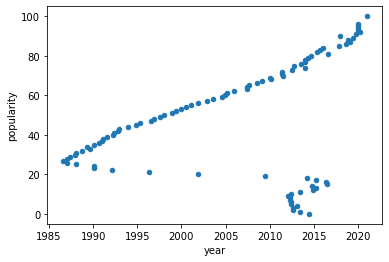

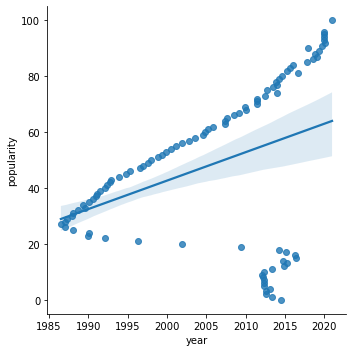

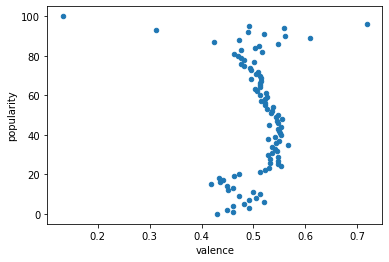

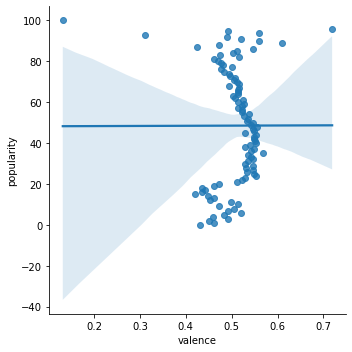

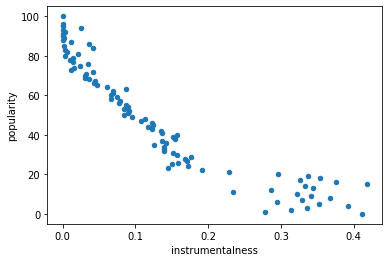

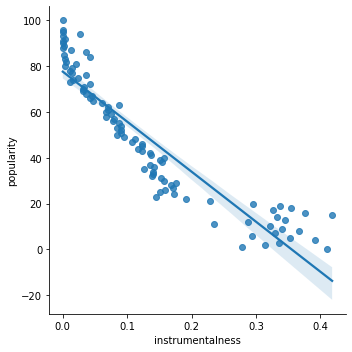

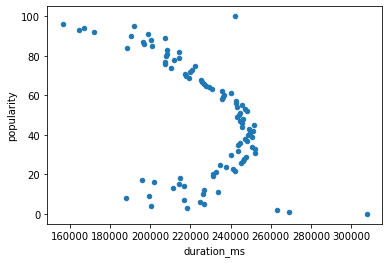

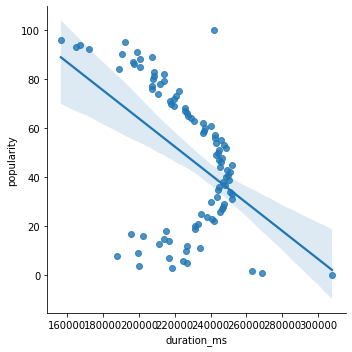

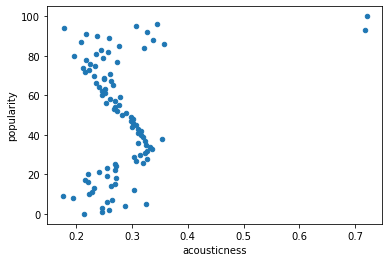

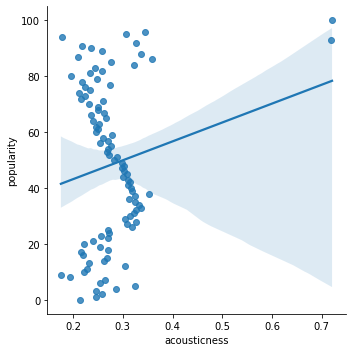

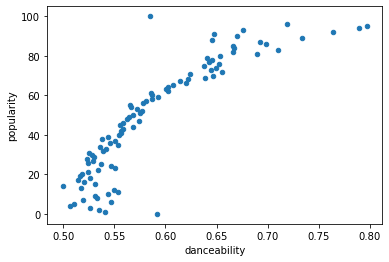

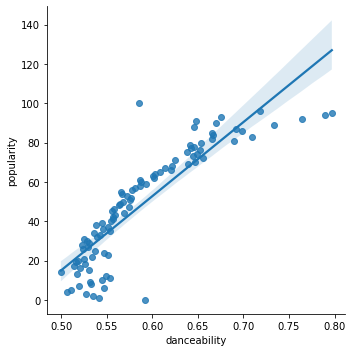

In [154]:
#data statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time


df = pd.read_csv('cleaned_spotify.csv')
df.drop(df.index[df['year'] < 1980], inplace=True)

l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))


print('')
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))

In [143]:
#mahine learning
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


df2 = pd.read_csv('cleaned_spotify.csv')
df2.drop(df2.index[df2['year'] < 1980], inplace=True)
df2.drop(df2.index[df2['popularity'] == 0], inplace=True)
X2 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
X12 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
y2 = df2['popularity']
X2_train, X2_test, y2_train, y2_test = train_test_split(X12,y2,test_size=0.2,random_state=0)

df3 = pd.read_csv('cleaned_spotify.csv')
df3.drop(df3.index[df3['year'] < 1980], inplace=True)
X = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
X1 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
y = df3['popularity']
print("number of samples: " + str(len(df3)))
mean = y.mean()
print("the mean is: " + str(mean))
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=0)
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0
y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0
print("number of popular samples: " + str(sum(y_bool_test) + sum(y_bool_train)))

number of samples: 65300
the mean is: 37.70030627871363
number of popular samples: 36686


In [157]:
#model1 = LogisticRegression(random_state = 0, solver = 'liblinear', class_weight = {'loudness' : 0.22, 'energy' : 0.2, 'instrumentalness' : 0.22, 'acousticness': 0.18, 'liveness': 0.2})
#model1 = LogisticRegression()
#params = {'C': [0.1, 1, 10]}
#grid = GridSearchCV(estimator = model1, param_grid = params)
#result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

#classification

model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))
print('')

model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))
print('')


[0.71385954 0.71379718 0.71458879 0.71556774 0.71791394]
avg cv score: 0.7151454394415728
score on test data: 0.7243938644235527

[0.72058473 0.72995392 0.73362784 0.72068831 0.72904029]
avg cv score: 0.726779015725517
score on test data: 0.724282448564897



In [152]:
#regression

#param_grid = {'max_depth': [5, 7, 9, 11], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05]}
#estimator = GradientBoostingRegressor()
#gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2')
#result = gs.fit(X2_train, y2_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

model4 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
gbscores = cross_val_score(model4, X_train, y_train, scoring='r2', cv=5)
print(gbscores)
print('avg cv score: ' + str(sum(gbscores)/len(gbscores)))
model4.fit(X_train, y_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))
print('')

model5 = LinearRegression()
lrscores = cross_val_score(model5, X_train, y_train, scoring='r2', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model5.fit(X_train, y_train)
pred = model5.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))
print('')

[0.3209917  0.32472242 0.34254812 0.34480099 0.31121089]
avg cv score: 0.3288548251926189
score on test data: 0.3337744068319006

[0.15916653 0.16705346 0.16636164 0.16481632 0.15901452]
avg cv score: 0.16328249314767534
score on test data: 0.16711185665840889



In [158]:
#model6 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
#gbscores = cross_val_score(model6, X_train, y_train, scoring='r2', cv=5)
#print(gbscores)
#print('avg cv score: ' + str(sum(gbscores)/len(gbscores)))
#model6.fit(X_train, y_train, [0.71, 0.43, 0.93, 0.18, 0.87, 0.095, 0.5, 0.0015, 0.87, 0.26])
#pred = model6.predict(X_test)
#print('score on test data: ' + str(r2_score(y_test, pred)))
#print('')

In [164]:
model7 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
model7.fit(X_train, y_train)
pred = model7.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy :" + str(prec))

pairwise ranking accuracy :0.6939518104134997
